## PHYS 6260: Homework 7, Mi Do

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Problem 1: Boundary value problem with a capacitor

Consider the following simple model of an electronic capacitor, consisting of two flat metal plots enclosed in a square metal box that is bounded to a voltage of 0 V, as shown in the figure below.
![alt text](HW7.JPG "boundary")
For simplicity, let's model the system in two dimemsions. Using any of the methods we have studied, write a program to calculate the electrostatic potential in teh box on a grid of 100 $\times$ 100 points, where the walls of teh box are at voltage zeros and the two plates (which are of negligible thickness) are at voltages $\pm$1 V as shown. 

This program calculates the value of the potential at each grid point to a precision of 1 $\mu$V and then make both a density plot and surface plot of the result.

In [7]:
# Constants
M = 100       
V = 1.0            
target = 1e-6  
delta = 1.0

In [8]:
# Create arrays to hold potential values
phi = np.zeros([M+1,M+1], float)
phi[20:81,20] = V
phi[20:81,80] = -V
phiprime = np.empty([M+1,M+1], float)

# calculate
while delta>target:
    
    for i in range(M+1):
        for j in range(M+1):
            if i == 0 or i == M or j == 0 or j == M or (20 <= i <= 80 and j == 20) or (20 <= i <= 80 and j == 80):
                phiprime[i,j] = phi[i,j]
            else:
                phiprime[i,j] = 0.25 * (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])

    # Calculate maximum difference from old values
    delta = np.max(abs(phi - phiprime))


    # Swap the two arrays around
    phi,phiprime = phiprime,phi

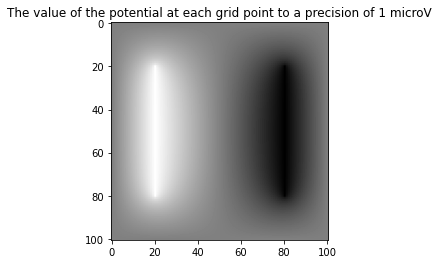

In [9]:
# Make a density plot
fig = plt.imshow(phi)
plt.gray()
plt.title('The value of the potential at each grid point to a precision of 1 microV')
plt.show()

In [13]:
np.shape(phi)

(101, 101)

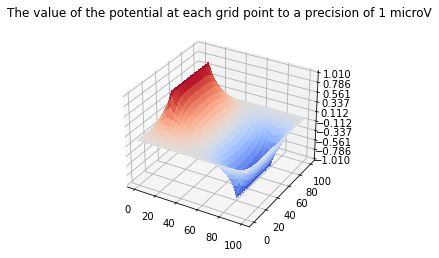

In [57]:
# Make a surface plot
x = np.arange(0, 101)
y = np.arange(0,101)
X,Y = np.meshgrid(x, y)

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, phi, cmap = cm.coolwarm, linewidth = 0, antialiased = False)

ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
plt.title('The value of the potential at each grid point to a precision of 1 microV')
plt.show()

## Problem 2: Thermal diffusion in the Earth's crust

A clasic example of a diffusion problem with a time-varying boundary condition is the diffusion of heat into the crust of the Earth, as surface temperature varies with the seasons. Suppose the mean daily temperature at a particular point on the surface varies as:
$$T_0(t) = A + B\sin \frac{2\pi t}{\tau}$$
where $\tau=$ 365 days, $A=10^\circ$ C and $B=12^\circ $C. At a depth of 20 m below the surface almost all annual temperature variation is ironed out and the temperature is, to a good approximation, a constant $11^\circ$ C (which is higher than the mean surface temperature of $10^\circ$ C-temperature increases with depth, due to heating from the hot core of the planet). The thermal diffusivity of the Earth's crust $D = 0.1 m^2d ay^{-1}$.

This program calculate the temperature profile of the crust as a function of depth up to 20 m and time up to 10 years. Start with temperature everywhere equal to 10$^\circ$ C, except at the surface and the deepest point. The first nine years are simulated, while for the tenth and final year, plot four temperature profiles taken a 3-month intervals on a single graph to illustrate how the temperature changes as a function of depth and time.

"for the tenth and final year" I'm not sure if I understand this correctly for the final year. Because, we have 10 years, first nine years are simulated and the last year is splited in four 3-month intervals?

In [18]:
# Constants
L = 20     
D = 0.1      
N = 100       
a = L/N      
h = 1e-3
epsilon = h/1000

tau = 365      
A = 10        
B = 12   

Tlo = 10 
Tmid = 10
Thi = 11

firstNineY = 9 * tau
yearNine1 = 9.25 * tau
yearNine2 = 9.5 * tau 
yearNine3 = 9.75 * tau
yearTen = 10 * tau

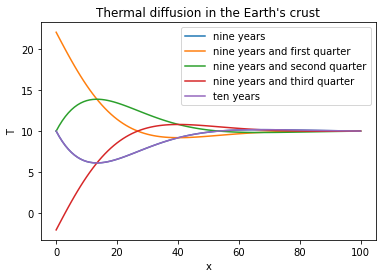

In [19]:
tend = yearTen + epsilon

T = np.empty(N+1,float)
T[0] = Thi
T[N] = Tlo
T[1:N] = Tmid

Tp = np.empty(N+1,float)
Tp[0] = Thi
Tp[N] = Tlo

T1 = []
T2 = []
T3 = []
T4 = []
T5 = []

def temp(t): 
    return A + B*np.sin(2*np.pi*t/tau) 

t = 0.0
c = h*D / (a*a)
while t < tend:

    # Calculate the new values of T
    T[0] = temp(t)
    for i in range(1,N):
        Tp[i] = T[i] + c*(T[i+1] + T[i-1] - 2*T[i])
    T, Tp = Tp, T
    t += h

    # Make plots at the given times
    if abs(t-firstNineY) < epsilon:
        plt.plot(T, label = "nine years")
        T1 = np.copy(T)
    if abs(t-yearNine1) < epsilon:
        plt.plot(T, label = "nine years and first quarter")
        T2 = np.copy(T)
    if abs(t-yearNine2) < epsilon:
        plt.plot(T, label = "nine years and second quarter")
        T3 = np.copy(T)
    if abs(t-yearNine3) < epsilon:
        plt.plot(T, label = "nine years and third quarter")
        T4 = np.copy(T)
    if abs(t-yearTen) < epsilon:
        plt.plot(T, label = "ten years")
        T5 = np.copy(T)
    
   
plt.title("Thermal diffusion in the Earth's crust")
plt.xlabel("x")
plt.ylabel("T")
plt.legend(loc = "upper right")
plt.show()

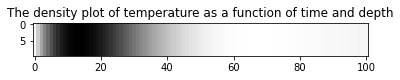

In [44]:
# For a density plot, I think it would be more appropriate to only consider the first 9 years
# or take the value in year 10 (which is the same as first 9 years)
# because we have a simulated pattern.
# So, in average, each of nine years will have a same set of temperature that depends on depth and time
# Then, our density plot will look like this
fig1 = plt.imshow([T1,T1,T1,T1,T1,T1,T1,T1,T1,T1])
plt.gray()
plt.title('The density plot of temperature as a function of time and depth')
plt.show()

## Problem 3: FTCS solution of the wave equation

Consider a piano string of length L, inittially at rest. At time t = 0, the string is struck by the piano hammer a distance d from the end of the string, as shown below. The string vibrates as a result of being struck, except at the ends, x = 0 and x = L, where it is held fixed.
![alt text](HW72.JPG "string")

### Part (a)

This program uses the FTCS method to solve the complete set of simultaneous first-order equations for the case $v = 100 m s^{-1}$, with the initial condition that $\phi(t)$ = 0 everywhere but the velocity $\psi(x)$ is non-zero, with the profile
$$\psi(x) = C \frac{x(L - x)}{L^2}exp\left[-\frac{(x-d)^2}{2\sigma^2}\right]$$ 
which is a Gaussian-like profile.

In [65]:
# Constants
L = 1
d = 0.1
C = 1       
sigma = 0.3
h = 1e-6

N = 100       
a = L/N       
v = 100     
epsilon = h/1000

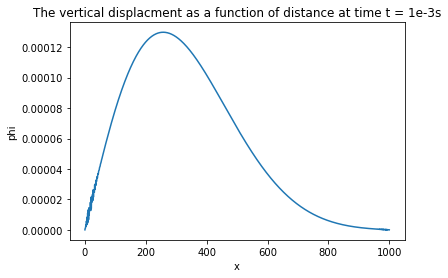

In [72]:
phiI = 0              
phiM = 0            
phiF = 0

psiI = 0.0               
psiF = 0.0              

t1e3 = 1e-3
tend = t1e3 + epsilon

phi = np.empty(N+1,float)
phi[0] = phiI
phi[N] = phiF
phi[1:N] = phiM

phip = np.empty(N+1,float)
phip[0] = phiI
phip[N] = phiF

psi = np.empty(N+1,float)
psi[N] = psiF

def cpsi(x):
    return C * x*(L-x) / (L**2) * np.exp((-(x-d)**2) / (2*sigma**2))

for i in range(0,N):
    psi[i] = cpsi(i*a)
    
psip = np.empty(N+1,float)
psip[0] = psiI
psip[N] = psiF

t = 0.0
D = h*v**2 / (a*a)
while t < tend:

    for i in range(1,N):
        phip[i] = phi[i] + h*psi[i]
        psip[i] = psi[i] + D*(phi[i+1]+phi[i-1]-2*phi[i])
      
    phi,phip = phip,phi
    psi,psip = psip,psi
    t += h

    if abs(t-t1e3)<epsilon:
        plt.plot(phi)
        
plt.title('The vertical displacment as a function of distance at time t = 1e-3s')
plt.xlabel('x')
plt.ylabel('phi')
plt.show()

### Part (b)

I gave up this part. My old friend cannot run heavy python package.

## Problem 4: The Schrodinger equation and the Crank-Nicolson method

### Part (a)

In [79]:
# Constants
M = 9.109e-31  
L = 1e-8 

x0 = L / 2
sigma = 1e-10
k = 5e10

N = 1000
a = L / N

hbar = 6.626e-34
h = 1e-18

In [96]:
### Step 1 ###
psi = np.empty(N+1,complex)
psi[0] = 0
psi[N] = 0
def cpsi(x):
    return np.exp(-(x-x0)** 2 / (2*sigma**2)) * exp(1j*k*x)

# Matrix B
b1 = 1 - h*1j*hbar/(2*M*a**2)
b2 = h * 1j * hbar / (4*M*a**2)

v = np.empty(N+1,complex)
v[0] = 0.0
for i in range(1,N):
    v[i] = b1*psi[i] + b2*(psi[i+1] + psi[i-1])

In [93]:
### Step 2 ###
A = zeros([N+1,N+1],complex)
a1 = 1 + h*1j*hbar/(2*M*a**2)
a2 = -h * 1j * hbar / (4*M*a**2) 
for i in range(N):
    A[i, i - 1] = a2
    A[i, i] = a1
    A[i, i + 1] = a2
    
from banded import banded
x = banded(A,v,1,1)

In [98]:
### Step 3 ###
for i in range(N):
    v[i] = b1*psi[i] + b2*(psi[i+1] + psi[i-1])
    x = banded(A,v,1,1)
    psi.append(x)

### Part (b)

### Part (c)